In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
# import cv2
import PIL
import warnings
%matplotlib inline

In [3]:
WomenShoes=pd.read_csv('/home/ubuntu/Data/WomensShoes.csv')
womenPixel=np.load('/home/ubuntu/Data/womenPixel.npy')
# womenPixel=np.load('/Users/Shahram/Desktop/DSI/DSI_SM_01/CapStone/Data/womenPixel2.npy')

In [11]:
np.save('womenPixel1_reduced.npy',womenPixel.astype('uint8'))

In [12]:
TEMP=np.concatenate((np.load('womenPixel1_reduced.npy'),np.load('womenPixel2_reduced.npy')),axis=3)
np.save('womenPixel.npy',TEMP)

In [8]:
np.shape(TEMP)

(120, 120, 24000)

In [4]:
womenPixel_Gray=np.zeros((120,120,14000),dtype='uint8')
for i in range(0,14000):
    womenPixel_Gray[:,:,i]=(0.299*womenPixel[:,:,0,i]+0.587*womenPixel[:,:,1,i]+0.114*womenPixel[:,:,2,i]).astype('uint8')   

In [5]:
np.save('womenPixel_Gray2.npy',womenPixel_Gray)

In [4]:
MensShoes=pd.read_csv('/home/ubuntu/Data/MensShoes.csv')
menPixel=np.load('/home/ubuntu/Data/menPixel.npy')

In [ ]:
np.save('menPixel.npy',menPixel.astype('uint8'))

In [3]:
np.shape(menPixel)

(120, 120, 3, 9929)

In [4]:
menPixel_Gray_test=np.zeros((120,120,9929),dtype='uint8')
for i in range(0,9929):
    menPixel_Gray[:,:,i]=(0.299*menPixel[:,:,0,i]+0.587*menPixel[:,:,1,i]+0.114*menPixel[:,:,2,i]).astype('uint8')   

NameError: name 'menPixel_Gray' is not defined

In [8]:
np.save('menPixel_Gray.npy',menPixel_Gray)

In [5]:
MensShoes.head(2)

,Unnamed: 0,image,category,name,price,sale_price,original_price
0,0,http://s2.onlineshoes.com/images/br008/mens-ne...,Men's New Balance,MW577 - Hook & Loop,NaN,$59.99,$76.95
1,1,http://s3.onlineshoes.com/images/br008/mens-ne...,Men's New Balance,MX608v4,NaN,$59.99,$69.95


In [4]:
for i in xrange(10):
    print i

0
1
2
3
4
5
6
7
8
9


In [5]:
womenPixel=np.concatenate((womenPixel1,womenPixel2),axis=3)

In [6]:
np.shape(womenPixel)

(120, 120, 3, 10000)

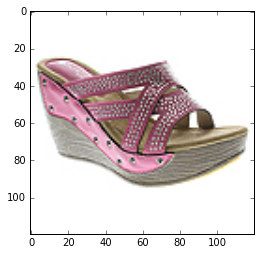

In [4]:
plt.imshow(womenPixel[:,:,:,6500].astype('uint8'))
# plt.axis('off')
# img=menPixel[:,:,:,93].astype('uint8')
# plt.imshow(img)

In [6]:
def multiple_image_show(imL):
    n_rows=np.floor(np.sqrt(len(imL))).astype(int)
    temp_arr=np.concatenate( [[np.concatenate([imL[i] for i in range((j-1)*n_rows,j*n_rows)],axis=1)] for j in range(0,n_rows)],axis=1)
    print "Missing " + str(int(len(imL) - n_rows*n_rows)) + " Input Image/s"
    plt.imshow(temp_arr[0,:,:,:].astype('uint8'))
    plt.axis('off')
    plt.show()

Missing 1 Input Image/s


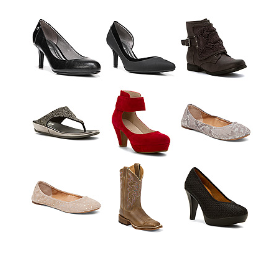

In [7]:
multiple_image_show([womenPixel[:,:,:,i] for i in range(2100,2110)])

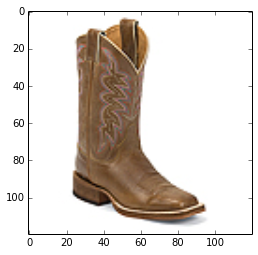

In [8]:
plt.imshow(womenPixel[:,:,:,2104])

Missing 1 Input Image/s


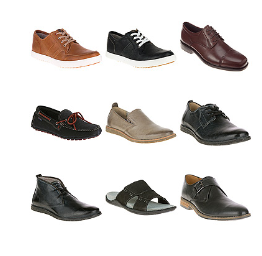

In [9]:
multiple_image_show([menPixel[:,:,:,i] for i in range(2100,2110)])

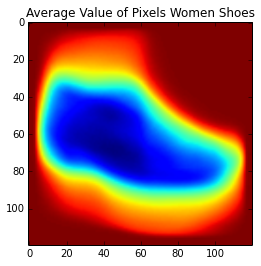

In [10]:
plt.imshow(womenPixel.mean((2,3)))
plt.title('Average Value of Pixels Women Shoes')

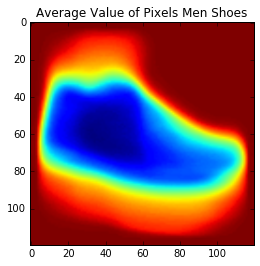

In [9]:
plt.imshow(menPixel.mean((2,3)))
plt.title('Average Value of Pixels Men Shoes')

#### GrayScaling (0.299r + 0.587g + 0.114b)

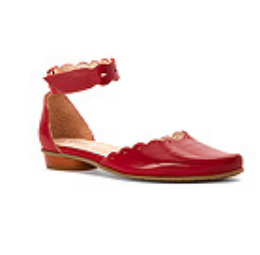

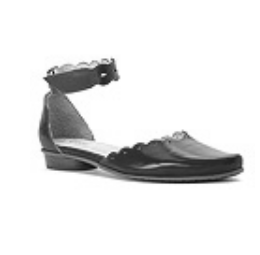

In [43]:
ind_temp=9000
plt.imshow(womenPixel[:,:,:,ind_temp].astype('uint8'))
plt.axis('off')
plt.show()


PIXEL=0.299*womenPixel[:,:,0,ind_temp]+0.587*womenPixel[:,:,1,ind_temp]+0.114*womenPixel[:,:,2,ind_temp]
plt.imshow(PIXEL,cmap="gray")
plt.axis('off')
plt.show()


In [ ]:
np.shape(menPixel)

In [ ]:
menPixel_Gray=(0.299*menPixel[:,:,0,:]+0.587*menPixel[:,:,1,:]+0.114*menPixel[:,:,2,:]).astype('uint8')   

In [92]:
womenPixel_Gray=(0.299*womenPixel[:,:,0,:]+0.587*womenPixel[:,:,1,:]+0.114*womenPixel[:,:,2,:]).astype('uint8')   
menPixel_Gray=(0.299*menPixel[:,:,0,:]+0.587*menPixel[:,:,1,:]+0.114*menPixel[:,:,2,:]).astype('uint8')   

KeyboardInterrupt: 

In [129]:
np.shape(menPixel)

(120, 120, 3, 9929)

In [ ]:
import sklearn
from sklearn import cluster
X=5000
womenPixel_Gray=np.zeros([120,120,1000])
for i in range(0,10000):
    womenPixel_Gray[:,:,i]=(0.299*womenPixel[:,:,0,X+i]+0.587*womenPixel[:,:,1,X+i]+0.114*womenPixel[:,:,2,X+i]).astype('uint8')   

In [ ]:
dn=np.transpose(np.reshape(menPixel_Gray[:,:,0:200],(120*120,200)))
kmeans=cluster.KMeans(n_clusters=6,n_jobs=4)
kmeans.fit(dn)

/Users/Shahram/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/Shahram/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/Shahram/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_vi

In [70]:
S=40
X=np.random.random_integers(0, high=9000, size=S)
Var_temp=np.zeros((120,120,3,S))
for i in range(S):
    Var_temp[:,:,:,i]=menPixel[:,:,:,X[i]]
dn=np.transpose(np.reshape(Var_temp,(120*120*3,S)))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 9000 + 1) instead
  from ipykernel import kernelapp as app


In [71]:
import sklearn
from sklearn import cluster
kmeans=cluster.KMeans(n_clusters=2,n_jobs=4)
kmeans.fit(dn)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=4, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [72]:
kmeans.predict(dn)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [73]:
c=kmeans.predict(dn)

In [74]:
def multiple_image_show_gray(imL,I,J,K):
    n_rows=np.floor(np.sqrt(len(imL))).astype(int)
    temp_arr=np.concatenate( [[np.concatenate([imL[i] for i in range((j-1)*n_rows,j*n_rows)],axis=1)] for j in range(0,n_rows)],axis=1)
    plt.subplot(I,J,K)
#     plt.title ("Missing " + str(int(len(imL) - n_rows*n_rows)) + " Input Image/s")
    plt.imshow(temp_arr[0,:,:].astype('uint8'),cmap="gray")
    plt.axis('off')
#     plt.show()

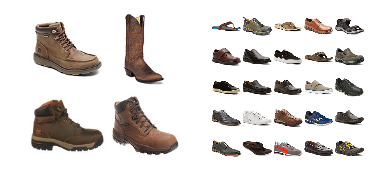

In [75]:
C1=[]
C2=[]

for i in range(0,S):
    if c[i]==0:
        C1.append(np.reshape(dn[i,:],(120,120,3)))
    if c[i]==1:
        C2.append(np.reshape(dn[i,:],(120,120,3)))

        
multiple_image_show_gray(C1,1,2,1)

multiple_image_show_gray(C2,1,2,2)


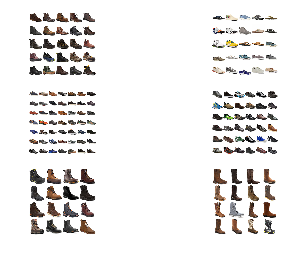

In [51]:
C1=[]
C2=[]
C3=[]
C4=[]
C5=[]
C6=[]
for i in range(0,S):
    if c[i]==0:
        C1.append(np.reshape(dn[i,:],(120,120,3)))
    if c[i]==1:
        C2.append(np.reshape(dn[i,:],(120,120,3)))
    if c[i]==2:
        C3.append(np.reshape(dn[i,:],(120,120,3)))
    if c[i]==3:
        C4.append(np.reshape(dn[i,:],(120,120,3)))
    if c[i]==4:
        C5.append(np.reshape(dn[i,:],(120,120,3)))
    if c[i]==5:
        C6.append(np.reshape(dn[i,:],(120,120,3)))
        
multiple_image_show_gray(C1,3,2,1)

multiple_image_show_gray(C2,3,2,2)

multiple_image_show_gray(C3,3,2,3)

multiple_image_show_gray(C4,3,2,4)

multiple_image_show_gray(C5,3,2,5)

multiple_image_show_gray(C6,3,2,6)

#### Finding a similarity  metric between two images

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

In [152]:
n_samples=10
V=np.reshape(menPixel[:,:,:,500:500+n_samples],(120*120*3,n_samples))
sim_ind=[]
for i in range(0,n_samples):
         sim_ind.append(pearsonr(V[:,0],V[:,i])[0])
sim_ind_sorted=sort(sim_ind)
# print sim_ind.sort()
# print sim_ind_sorted
# print sim_ind


None


In [101]:
from sklearn.cluster import Birch
n_samples=50
dn=np.transpose(np.reshape(menPixel[:,:,:,500:500+n_samples],(120*120*3,n_samples)))

brc = Birch(branching_factor=50, n_clusters=3, threshold=0.5,compute_labels=True)
brc.fit(dn)
c=brc.predict(dn)

In [107]:
np.shape(dn)
c[46]

0

In [108]:
for i in range(0,50):
        print (46,i,pearsonr(np.transpose(dn)[:,46],np.transpose(dn)[:,i]),c[i])

(46, 0, (0.54201847731617669, 0.0), 2)
(46, 1, (0.5276316511128526, 0.0), 2)
(46, 2, (0.67961196716793482, 0.0), 2)
(46, 3, (0.66032637888032197, 0.0), 2)
(46, 4, (0.54856099499103683, 0.0), 0)
(46, 5, (0.60559621633230321, 0.0), 0)
(46, 6, (0.53468902689207043, 0.0), 0)
(46, 7, (0.50359148769850359, 0.0), 0)
(46, 8, (0.54769447295745177, 0.0), 0)
(46, 9, (0.52983143825946732, 0.0), 0)
(46, 10, (0.43894011255598631, 0.0), 0)
(46, 11, (0.43366493830185482, 0.0), 0)
(46, 12, (0.47381854845242072, 0.0), 0)
(46, 13, (0.4402074035370856, 0.0), 0)
(46, 14, (0.50635014483755647, 0.0), 0)
(46, 15, (0.4106964231496637, 0.0), 1)
(46, 16, (0.54838945894369384, 0.0), 0)
(46, 17, (0.46303292676677438, 0.0), 1)
(46, 18, (0.33288265464849892, 0.0), 1)
(46, 19, (0.33280737106610359, 0.0), 1)
(46, 20, (0.29685993250312825, 0.0), 1)
(46, 21, (0.24100968978776408, 0.0), 1)
(46, 22, (0.81180907740465591, 0.0), 0)
(46, 23, (0.46846220629121954, 0.0), 1)
(46, 24, (0.47614786939637416, 0.0), 1)
(46, 25, (0.4

Missing 2 Input Image/s


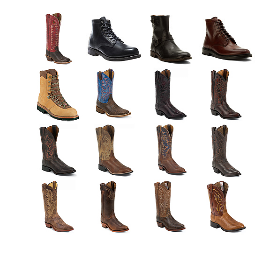

Missing 3 Input Image/s


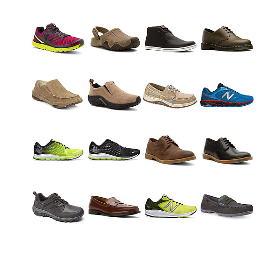

Missing 4 Input Image/s


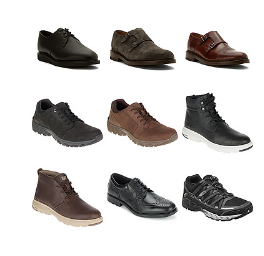

In [124]:
C1=[]
C2=[]
C3=[]
for i in range(0,50):
    if c[i]==0:
        C1.append(np.reshape(dn[i,:],(120,120,3)))
    if c[i]==1:
        C2.append(np.reshape(dn[i,:],(120,120,3)))
    if c[i]==2:
        C3.append(np.reshape(dn[i,:],(120,120,3)))
subplot()        
multiple_image_show(C1)
multiple_image_show(C2)
multiple_image_show(C3)

Missing 0 Input Image/s


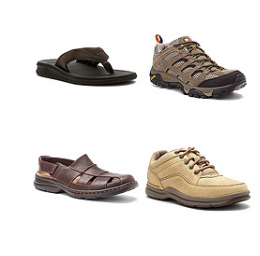

In [15]:
multiple_image_show([menPixel[:,:,:,i] for i in range(50,54)])

In [94]:
pixtest=np.reshape(menPixel[:,:,:,1600:1604],[120*120*3,4])

In [95]:
np.shape(pixtest)

(43200, 4)

In [96]:
pixtest[0,3]

255

Missing 1 Input Image/s


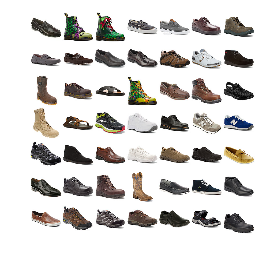

In [100]:
multiple_image_show([menPixel[:,:,:,i] for i in range(1600,1650)])
# multiple_image_show([menPixel[:,:,:,i] for i in range(1601,1602)])
# multiple_image_show([menPixel[:,:,:,i] for i in range(1602,1603)])
# multiple_image_show([menPixel[:,:,:,i] for i in range(1603,1604)])


In [99]:
for i in range(0,4):
    for j in range(0,4):
        print (i,j,pearsonr(pixtest[:,i],pixtest[:,j]))

(0, 0, (1.0, 0.0))
(0, 1, (0.86943830606806394, 0.0))
(0, 2, (0.70200404066088828, 0.0))
(0, 3, (0.64093492031506982, 0.0))
(1, 0, (0.86943830606806394, 0.0))
(1, 1, (1.0, 0.0))
(1, 2, (0.73361222322701869, 0.0))
(1, 3, (0.67563156083724829, 0.0))
(2, 0, (0.70200404066088828, 0.0))
(2, 1, (0.73361222322701869, 0.0))
(2, 2, (1.0, 0.0))
(2, 3, (0.94046682175948393, 0.0))
(3, 0, (0.64093492031506982, 0.0))
(3, 1, (0.67563156083724829, 0.0))
(3, 2, (0.94046682175948393, 0.0))
(3, 3, (1.0, 0.0))
